In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import os # Necessário para manipulação de caminhos de arquivos

2025-06-08 17:47:34.004442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-08 17:47:34.008764: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-08 17:47:34.020066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749415654.038337   38532 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749415654.043659   38532 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749415654.058035   38532 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [11]:
base_dir = 'train'
train_dir = os.path.join(base_dir, 'treino')
validation_dir = os.path.join(base_dir, 'validacao')
test_dir = os.path.join(base_dir, 'teste')

In [12]:
IMG_SIZE = (150, 150) # Redimensionamento para um tamanho padrão de 150x150 pixels 
BATCH_SIZE = 32

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalização dos pixels para o intervalo [0, 1] 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary' # Classificação binária (gato ou cachorro)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False # Importante para a avaliação manter a ordem
)
print("\nDados preparados e carregados com sucesso!")
print("Classes encontradas:", train_generator.class_indices)


Found 3748 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 17502 images belonging to 2 classes.

Dados preparados e carregados com sucesso!
Classes encontradas: {'cachorros': 0, 'gatos': 1}


In [16]:
print("\nEtapa 2: Construção e Treinamento do Modelo CNN")

# 2.1. Construção da Rede Convolucional Simples
model = models.Sequential([
    # Primeiro bloco convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    # Segundo bloco convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Terceiro bloco convolucional
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Camada para achatar os mapas de características em um vetor 1D
    layers.Flatten(),

    # Camada densa para aprendizado
    layers.Dense(512, activation='relu'),

    # Camada final de saída com ativação sigmoid para classificação binária
    layers.Dense(1, activation='sigmoid')
])



Etapa 2: Construção e Treinamento do Modelo CNN


In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary() # Exibe a arquitetura do modelo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
EPOCHS = 15 # Definindo o número de épocas

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

print("\nTreinamento concluído!")


/home/glkaiky/Desktop/PucMinas/Ia/Lista 12/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


2025-06-08 17:50:26.172298: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


  1/117 ━━━━━━━━━━━━━━━━━━━━ 3:34 2s/step - accuracy: 0.4688 - loss: 0.6935

2025-06-08 17:50:26.664124: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2025-06-08 17:50:26.768179: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


  2/117 ━━━━━━━━━━━━━━━━━━━━ 1:04 564ms/step - accuracy: 0.4609 - loss: 1.1825

2025-06-08 17:50:27.223068: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2025-06-08 17:50:27.331359: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


117/117 ━━━━━━━━━━━━━━━━━━━━ 80s 674ms/step - accuracy: 0.5029 - loss: 0.8163 - val_accuracy: 0.5048 - val_loss: 0.6933
Epoch 2/15
  1/117 ━━━━━━━━━━━━━━━━━━━━ 1:01 530ms/step - accuracy: 0.5000 - loss: 0.6911

/home/glkaiky/Desktop/PucMinas/Ia/Lista 12/venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.5000 - loss: 0.6911 - val_accuracy: 0.4810 - val_loss: 0.6938
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 703ms/step - accuracy: 0.5036 - loss: 0.6932 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.5625 - loss: 0.6927 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 81s 690ms/step - accuracy: 0.5073 - loss: 0.6931 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4062 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 84s 719ms/step - accuracy: 0.4932 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 86s 733ms/step - accuracy: 0.4915 - loss: 0.6932 - val_a

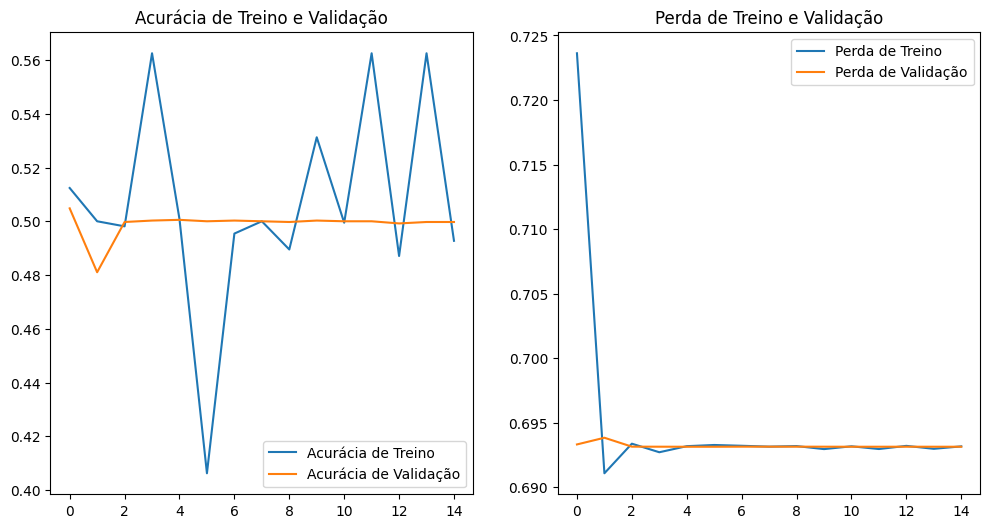

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

In [20]:
print("\nEtapa 3: Avaliação e Testes")

# 3.1. Avaliação do desempenho nos dados de teste
print("\nAvaliando o modelo no conjunto de teste...")
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")

# 3.2. Cálculo de Precisão, Recall e F1-Score
# Fazendo previsões no conjunto de teste
Y_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1)
y_pred = (Y_pred > 0.5).astype(int) # Convertendo probabilidades para classes binárias (0 ou 1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nRelatório de Classificação:")
print(classification_report(true_classes[:len(y_pred)], y_pred, target_names=class_labels))

print("\nMatriz de Confusão:")
print(confusion_matrix(true_classes[:len(y_pred)], y_pred))


Etapa 3: Avaliação e Testes

Avaliando o modelo no conjunto de teste...
546/546 ━━━━━━━━━━━━━━━━━━━━ 57s 104ms/step - accuracy: 0.1539 - loss: 0.6940
Acurácia no conjunto de teste: 0.4991
547/547 ━━━━━━━━━━━━━━━━━━━━ 56s 102ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

   cachorros       0.00      0.00      0.00      8751
       gatos       0.50      1.00      0.67      8751

    accuracy                           0.50     17502
   macro avg       0.25      0.50      0.33     17502
weighted avg       0.25      0.50      0.33     17502


Matriz de Confusão:
[[   0 8751]
 [   0 8751]]


/home/glkaiky/Desktop/PucMinas/Ia/Lista 12/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/glkaiky/Desktop/PucMinas/Ia/Lista 12/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/glkaiky/Desktop/PucMinas/Ia/Lista 12/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [21]:
def classify_new_image(image_path, model):
    """Carrega, pré-processa e classifica uma nova imagem."""
    from tensorflow.keras.preprocessing import image

    try:
        # Carregar e redimensionar a imagem
        img = image.load_img(image_path, target_size=IMG_SIZE)

        # Converter para array e normalizar
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Fazer a previsão
        prediction = model.predict(img_array)

        # Exibir a imagem e o resultado
        plt.imshow(img)
        plt.axis('off')

        # Interpretar o resultado
        # train_generator.class_indices geralmente é {'cachorros': 0, 'gatos': 1}
        # A saída sigmoid < 0.5 tende para a classe 0 (cachorro)
        # A saída sigmoid > 0.5 tende para a classe 1 (gato)
        if prediction[0][0] < 0.5:
            label = 'Cachorro'
            confidence = 1 - prediction[0][0]
        else:
            label = 'Gato'
            confidence = prediction[0][0]

        plt.title(f"Previsão: {label} ({confidence:.2%})")
        plt.show()

    except FileNotFoundError:
        print(f"ERRO: O arquivo '{image_path}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro ao processar a imagem: {e}")



Testando com imagens novas...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


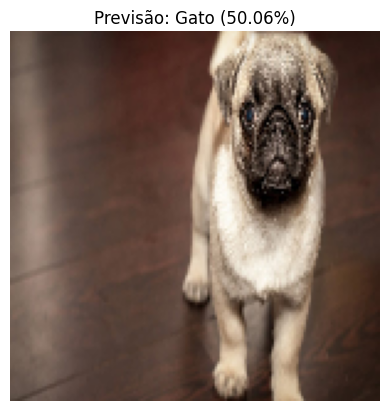

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


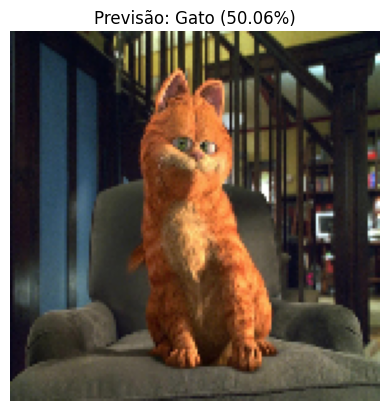

In [23]:
print("\nTestando com imagens novas...")
try:
    classify_new_image('dog_teste.jpg', model)
    classify_new_image('gato_teste.webp', model)
except Exception as e:
    print("\n--- AVISO ---")
    print("Não foi possível testar com imagens novas. Certifique-se de que os arquivos")
    print("que este notebook, ou forneça o caminho completo para elas.")
    print("-------------\n")
